# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
sys.path.append('E:/udacity_deep_reinforcement_learning/deep-reinforcement-learning-master/python')

In [2]:
import matplotlib.pyplot as plt
import json

import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [4]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13949999688193201


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
def reduce_learning_rate(optimizer, episode, factor):
    """Reduce the learning rate by multiplying factor applicable only if epoch is more than 400
       Parameters:
       optimizer: Optimizer Used
       episode: Current Episode
       factor: The multiplication factory by which learning rate needs to be reduced
    """
    # If episode is less than 25, do not do anything
    if episode <= 25:
        return
    
    # Update the learning Rate by multiplying by factor and update only if
    # new learning rate is not less than 1e-6
    for param_group in optimizer.param_groups:
        change_lr_value=np.around(param_group['lr']*factor, 8)
        if change_lr_value <= 0.000001:
            change_lr_value = 0.000001  
        param_group['lr'] = change_lr_value
        print("\nAs mean score over 10  episodes did not improve by 1.5 after 10 episodes, learning rate has been changed to: " +str(param_group['lr']))
            
def learning_rate_adjustment_needed(mean_score_list, episode, episode_last_lr_update):
    """This method finds out if adjustment of learning rate is needed or not. 
       The logic is find the difference between current mean score and the mean score 
       100 episodes back. If the diffrence is less than 1.0, then learning rate adjustment is needed
       and the method will return True, else the method will return False
      
       Parameters:
       mean_score_list: List
       episode: Current Episode
       factor: The multiplication factory by which learning rate needs to be reduced
    """
    if episode-episode_last_lr_update < 20:
        return False
    if len(mean_score_list) < 10:
        return False
    mean_score_current = mean_score_list[-1]
    mean_score_10_before = mean_score_list[-10]
    if (mean_score_current - mean_score_10_before) < 1.5:
        return True
    else:
        return False

In [9]:
GAMMA=0.99
from ddpg_agent import Agent


def ddpg(actor_hidden_layers, critic_hidden_layers, actor_model_file_path, critic_model_file_path,  n_episodes=2000, max_t=2000, learning_rate_reduction_factor=0.7):
    global env_info
    
    agent = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, num_agents=env_info.vector_observations.shape[0],  random_seed=52, actor_hidden_layers=actor_hidden_layers, critic_hidden_layers=critic_hidden_layers)
    
    scores_deque = deque(maxlen=100)
    scores = []
    mean_over_100_score_list = []
    number_of_steps_list = []
    
    max_score = -np.Inf
    episode_last_lr_update = 0
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        states = env_info.vector_observations                   # get the current states (for all agents)
        agent.reset() 
        current_scores = np.zeros(num_agents)                    
        for t in range(max_t):
            actions = agent.act(states)                        # get action
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get rewards (for each agent)
            dones = env_info.local_done                        # see if episode finished
            current_scores += rewards                          # update the score (for each agent)
            agent.step(states, actions, rewards, next_states, dones) #train the agent
     
            if len(agent.memory) > 256:
                for i in range(4):
                    agent.learn(agent.memory.sample(), GAMMA)
            
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        scores_deque.append(np.mean(current_scores))
        scores.append(np.mean(current_scores))
        mean_over_100_score_list.append(np.mean(scores_deque))
        number_of_steps_list.append(t)
        print('\nEpisode: {}\tAverage Score: {:.2f}\tCurrent Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(current_scores)), end="")
        if np.mean(scores_deque) > max_score:
            max_score = np.mean(current_scores)
            torch.save(agent.actor_local.state_dict(), actor_model_file_path)
            torch.save(agent.critic_local.state_dict(), critic_model_file_path)
        
             
        if np.mean(scores_deque) > 30.0 and len(scores_deque) >= 100:
            torch.save(agent.actor_local.state_dict(), actor_model_file_path)
            torch.save(agent.critic_local.state_dict(), critic_model_file_path)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            print('\rEnvironment is solved in {} Episodes'.format(i_episode))
            break
            
        if learning_rate_adjustment_needed(mean_over_100_score_list, i_episode, episode_last_lr_update):
            reduce_learning_rate(agent.get_actor_optimizer(), i_episode, learning_rate_reduction_factor)
            reduce_learning_rate(agent.get_critic_optimizer(), i_episode, learning_rate_reduction_factor)
            episode_last_lr_update = i_episode
        
    return scores, mean_over_100_score_list,number_of_steps_list



## Try with 128x128 Neural network

In [10]:
import time
actor_hidden_layers = [128,128]
critic_hidden_layers = [128,128]
actor_model_file_path = "actor_best_model_128_128.pth"
critic_model_file_path = "critic_best_model_128_128.pth"

start_time = time.time()
scores, mean_score_list, number_of_steps_list = ddpg(actor_hidden_layers, critic_hidden_layers, actor_model_file_path, critic_model_file_path)
end_time = time.time()
print('Training Time Taken is: {}'.format(end_time-start_time ))


E:\anaconda\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
E:\udacity_rl_project_trials\p2_continuous-control\ddpg_agent.py:130: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1.0) #clip the gradient for the critic network (Udacity hint)



Episode: 1	Average Score: 0.75	Current Score: 0.75
Episode: 2	Average Score: 0.71	Current Score: 0.66
Episode: 3	Average Score: 0.87	Current Score: 1.20
Episode: 4	Average Score: 1.09	Current Score: 1.74
Episode: 5	Average Score: 1.37	Current Score: 2.48
Episode: 6	Average Score: 1.55	Current Score: 2.44
Episode: 7	Average Score: 1.73	Current Score: 2.81
Episode: 8	Average Score: 2.09	Current Score: 4.67
Episode: 9	Average Score: 2.41	Current Score: 4.97
Episode: 10	Average Score: 2.76	Current Score: 5.90
Episode: 11	Average Score: 3.16	Current Score: 7.11
Episode: 12	Average Score: 3.59	Current Score: 8.36
Episode: 13	Average Score: 4.09	Current Score: 10.03
Episode: 14	Average Score: 4.58	Current Score: 11.00
Episode: 15	Average Score: 5.09	Current Score: 12.26
Episode: 16	Average Score: 5.51	Current Score: 11.72
Episode: 17	Average Score: 5.97	Current Score: 13.36
Episode: 18	Average Score: 6.46	Current Score: 14.84
Episode: 19	Average Score: 6.86	Current Score: 14.02
Episode: 20	A

## Plot scores vs episodes

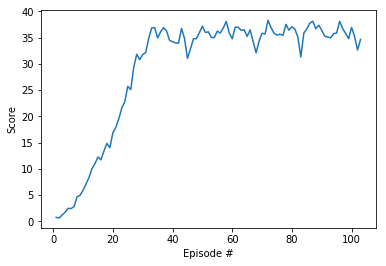

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

## Plot mean score scores over 100 consecutive episodes vs episodes

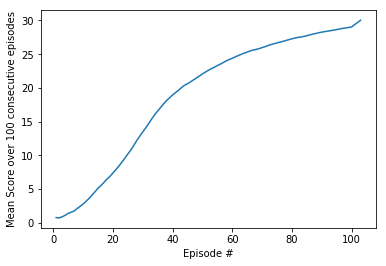

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_score_list)+1), mean_score_list)
plt.ylabel("Mean Score over 100 consecutive episodes")
plt.xlabel("Episode #")
plt.show()

## Plot number of steps taken versus episodes

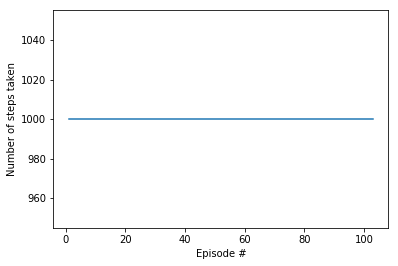

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(number_of_steps_list)+1), number_of_steps_list)
plt.ylabel("Number of steps taken")
plt.xlabel("Episode #")
plt.show()

## Perform Test by loading the model

In [24]:
def ddpg_test(actor_model_file_path, n_episodes=5, max_t=2000):
    global env_info
    
    agent = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, num_agents=env_info.vector_observations.shape[0],  random_seed=52, actor_hidden_layers=actor_hidden_layers, critic_hidden_layers=critic_hidden_layers)
    agent.actor_local.load_state_dict(torch.load(actor_model_file_path, map_location=lambda storage, loc: storage))
    agent.eps = 0.05
    scores = []
      
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
        states = env_info.vector_observations                   # get the current states (for all agents)
        agent.reset() 
        current_scores = np.zeros(num_agents)                    
        for t in range(max_t):
            actions = agent.act(states)                        # get action
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get rewards (for each agent)
            dones = env_info.local_done                        # see if episode finished
            current_scores += rewards                          # update the score (for each agent)
                         
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        scores.append(np.mean(current_scores))
        print('Episode: {}:  Score:{:.2f}'.format(i_episode, np.mean(current_scores)))
    
    mean_score = np.mean(scores)
    print('Mean score over 5 Episodes is : ' + str(mean_score))  
        
    return scores

In [25]:
ddpg_test(actor_model_file_path)

E:\anaconda\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 1:  Score:33.50
Episode: 2:  Score:34.82
Episode: 3:  Score:35.82
Episode: 4:  Score:35.16
Episode: 5:  Score:34.96
Mean score over 5 Episodes is : 34.85289922097697


[33.50249925116077,
 34.82349922163412,
 35.821999199315904,
 35.15799921415746,
 34.95849921861664]

In [26]:
env.close()

## Conclustion

I have used DDPG algorith for this Continous Control project. I have utilized 64x64 neural networks for both Actor and Critic. I have trained the agent and achieved the goal of score of 30 over consecutive 100 episodes in just 103 episodes.

## Further Improvements:

Further improvements can be done by utilizing  and i. Proximal Policy Optimization (PPO) algorithm ii. Prioritized Experence Replay